In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read the csv fil
data = pd.read_csv('titanic.csv', usecols=['Cabin', 'Survived'])
data.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [3]:
#Fill na Value with missing value

data.Cabin.fillna('Missing', inplace=True)
data.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [4]:
len(data.Cabin.unique())

148

In [5]:
# Now we extract the first letter of the cabin
data['Cabin'] = data['Cabin'].astype(str).str[0]
data.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [6]:
# check the labels
data.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [7]:
# Let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data[['Cabin', 'Survived']],
                                                    data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 2), (268, 2))

In [ ]:
#Important - we are doing only for the training set you should reserh after apply all these things.

In [8]:
#calculate Probibility of survive

X_train.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.428571
B    0.774194
C    0.571429
D    0.692308
E    0.740741
F    0.666667
G    0.500000
M    0.303609
T    0.000000
Name: Survived, dtype: float64

In [9]:
# let's make a dataframe with the above

prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.428571
B,0.774194
C,0.571429
D,0.692308
E,0.740741
F,0.666667
G,0.500000
M,0.303609
T,0.000000


In [10]:
# now let's  calculate the probability of target = 0 (people who did not survive)
prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df['Died'] = 1-prob_df.Survived
prob_df

,Survived,Died
Cabin,,
A,0.428571,0.571429
B,0.774194,0.225806
C,0.571429,0.428571
D,0.692308,0.307692
E,0.740741,0.259259
F,0.666667,0.333333
G,0.500000,0.500000
M,0.303609,0.696391
T,0.000000,1.000000


In [11]:
#  and now the ratio

prob_df['ratio'] = prob_df.Survived/prob_df.Died
prob_df

,Survived,Died,ratio
Cabin,,,
A,0.428571,0.571429,0.750000
B,0.774194,0.225806,3.428571
C,0.571429,0.428571,1.333333
D,0.692308,0.307692,2.250000
E,0.740741,0.259259,2.857143
F,0.666667,0.333333,2.000000
G,0.500000,0.500000,1.000000
M,0.303609,0.696391,0.435976
T,0.000000,1.000000,0.000000


In [12]:
# let's make a dictionary with the above ratio

prob_df['ratio'].to_dict()

{'A': 0.75,
 'B': 3.428571428571428,
 'C': 1.3333333333333333,
 'D': 2.25,
 'E': 2.8571428571428563,
 'F': 1.9999999999999998,
 'G': 1.0,
 'M': 0.4359756097560975,
 'T': 0.0}

In [13]:
ordered_labels = prob_df['ratio'].to_dict()

In [14]:
# replace the labels with the ratios

X_train['Cabin_ordered'] = X_train.Cabin.map(ordered_labels)
X_test['Cabin_ordered'] = X_test.Cabin.map(ordered_labels)

In [15]:
# check the results

X_train.head()

,Cabin,Survived,Cabin_ordered
857,E,1,2.857143
52,D,1,2.250000
386,M,0,0.435976
124,D,0,2.250000
578,M,0,0.435976


Text(0,0.5,'Survived')

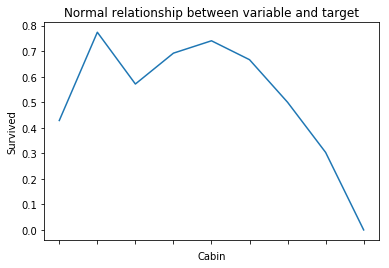

In [16]:
# plot the original variable

fig = plt.figure()
fig = X_train.groupby(['Cabin'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

Text(0,0.5,'Survived')

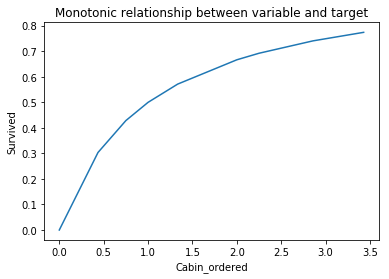

In [17]:
# plot the transformed result: the monotonic variable

fig = plt.figure()
fig = X_train.groupby(['Cabin_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')